<a href="https://colab.research.google.com/github/OhJunYoung21/artificial-inteliigence/blob/main/Jarvis_tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np


f = pd.read_csv('/content/tomato.csv',encoding = 'cp949')

tomato_df = pd.DataFrame(f)

tomato_df

,Name,Rating,Directed By,Runtime,Studio,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count
0,The Angry Birds Movie 2,PG (for rude humor and action),Thurop Van Orman,100,Columbia Pictures,73,107,84,"4,023"
1,Legend Of The Demon Cat (K청kai),NR,Kaige Chen,129,Well Go USA,91,11,37,74
2,Dora and the Lost City of Gold,PG (for action and some impolite humor),James Bobin,102,Paramount Pictures,84,148,88,"6,715"
3,Luce,R (for language throughout sexual content nud...,Julius Onah,109,NEON,91,151,77,284
4,Good Boys,R (for strong crude sexual content drug and a...,Gene Stupnitsky,95,Universal Pictures,80,237,86,"13,007"
...,...,...,...,...,...,...,...,...,...
2095,The Boy And The Beast (Bakemono No Ko),R (for strong combat violence throughout bloo...,Michael Bay,144,Paramount Pictures,51,67,82,"33,491"
2096,The Other Side of the Door,R (for strong sexual content graphic nudity a...,Charlie Kaufman Duke Johnson,96,Starburns Industries,92,37,71,"19,600"
2097,Touched With Fire,R (for violence and language throughout.),Paco Cabezas,90,Circle of Confusion,44,50,55,"6,208"
2098,The Funhouse Massacre,R (for language and some violence/torture),Florian Gallenberger,110,Majestic Filmproduktion,26,14,61,"3,914"


In [5]:
np.mean(tomato_df['TOMATOMETER score'])

63.76380952380952

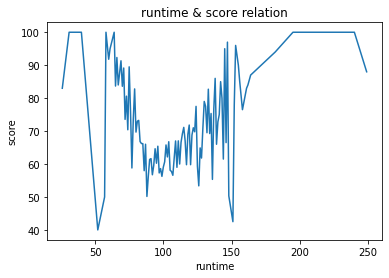

In [6]:
Run_1 = tomato_df.groupby(by='Runtime')


RUN_1 = pd.DataFrame(Run_1['TOMATOMETER score'].mean())

import matplotlib.pyplot as plt


plt.title('runtime & score relation')
plt.xlabel('runtime')
plt.ylabel('score')
plt.plot(RUN_1)
plt.show()


In [7]:
import numpy as np


rate = tomato_df.groupby('Rating')['TOMATOMETER score'].mean()


rate = pd.DataFrame(rate)

num_1 = np.arange(0,len(rate.index),1).tolist()

rate  = pd.DataFrame({'Rating':rate.index,
                      'TOMATOMETER score':rate['TOMATOMETER score']},
                     index = num_1,columns = ['Rating','TOMATOMETER score']
                      )


rate['TOMATOMETER score'] = tomato_df['TOMATOMETER score']

rate

,Rating,TOMATOMETER score
0,G,73
1,NC17,91
2,NR,84
3,NR (for bloody violence language and some sex...,91
4,NR (for bloody violence language throughout a...,80
...,...,...
960,R (for zombie violence/gore and for language),54
961,R (or violence sexual content/nudity and lang...,44
962,R (some violence),93
963,R (strong violence a rape disturbing images a...,82


In [ ]:
rating = []


for j in rate['Rating']:
  if ' (' in j:
    new_list = j.split('(')
    rating.append(new_list[0])
  else:
    continue

#rating = rate['Rating'][:3].tolist() + rating


final = rate.iloc[:961,:]


final['Rating'] = ['G','NC17'] + rating

rate_graph =  pd.DataFrame(final.groupby('Rating')['TOMATOMETER score'].mean())

rate_graph

프로젝트의 목적:
1.score을 예측할 때 사용하는 훈련데이터가 rating,runtime,audience count 등을 사용할 건데 자료형이 object인 경우가 있어서 corr(),시각화에 어려움이 있습니다. 이 문제를 어떻게 해결해야 할까요?


2.예를 들어 영화점수가 런타임도 길고, 배급사나 등급이 ~할 때 제일 좋더라 라는 결론을 얻고 싶습니다. 쉽게 말해서 매개변수가 2개 이상인 경우에는 어떻게 데이터를 전처리해야 하며, 어떤 모델을 써야 하나요?



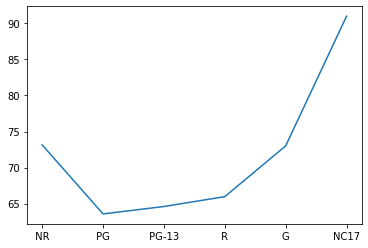

In [10]:
plt.plot(rate_graph)
plt.show()    #각 등급별로 영화의 평점을 그래프로 나타내었다.

In [9]:
tomato_1 = pd.get_dummies(tomato_df)

tomato_1.columns

Index(['Runtime', 'TOMATOMETER score', 'TOMATOMETER Count', 'AUDIENCE score',
       'Name_09월 11일', 'Name_1 Night (One Night)', 'Name_10  Gone',
       'Name_100 Streets', 'Name_10x10', 'Name_11  (11 Minut)',
       ...
       'AUDIENCE count_965', 'AUDIENCE count_97', 'AUDIENCE count_971',
       'AUDIENCE count_973', 'AUDIENCE count_98', 'AUDIENCE count_983',
       'AUDIENCE count_984', 'AUDIENCE count_987', 'AUDIENCE count_99',
       'AUDIENCE count_991'],
      dtype='object', length=7079)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 


score_data = tomato_df['AUDIENCE score']
score_target = tomato_df['TOMATOMETER score']


x_train,x_test,y_train,y_test = train_test_split(score_data,score_target,random_state = 0)


x_train = x_train[:,np.newaxis]

x_test = x_test[:,np.newaxis]    #1차원의 배열로는 학습이 불가능하기 때문에 np.newaxis를 사용해서 차원을 늘려주었습니다.

lin_1 = LinearRegression()
lin_1.fit(x_train,y_train)


score = lin_1.score(x_test,y_test)  #score를 알아봅시다.


print("선형회귀를 사용했을 때의 점수(지도학습):{:.2f}".format(score))  #소수점 2번째 자리까지 출력할 것이다.

선형회귀를 사용했을 때의 점수(지도학습):0.31


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


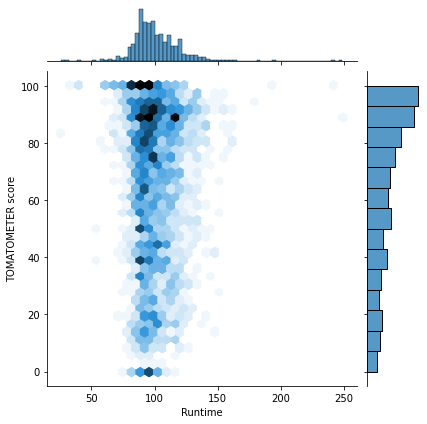

In [12]:
import seaborn as sns
sns.jointplot(data=tomato_df,x='Runtime',y='TOMATOMETER score',kind="hex")

In [13]:
tomato_df['Rating']

0                          PG (for rude humor and action)
1                                                      NR
2                 PG (for action and some impolite humor)
3        R (for language throughout sexual content nud...
4        R (for strong crude sexual content drug and a...
                              ...                        
2095     R (for strong combat violence throughout bloo...
2096     R (for strong sexual content graphic nudity a...
2097            R (for violence and language throughout.)
2098           R (for language and some violence/torture)
2099              PG-13 (for some violence and language.)
Name: Rating, Length: 2100, dtype: object

In [14]:
text_train ,y_train  = tomato_df['Rating'],tomato_df['TOMATOMETER score']

In [15]:
print('text_Train의 길이:',len(text_train))
print("text_train의 타입:",type(text_train))
print("text_train[10]:\n",text_train[10])

text_Train의 길이: 2100
text_train의 타입: <class 'pandas.core.series.Series'>
text_train[10]:
  R (for some disturbing violence)


In [16]:
y_train.unique()  #어떤 평점들이 존재하는지를 보여주는 기능을 합니다.unique()

array([ 73,  91,  84,  80,  67,  90,  61,  98,  39,  59,  44,  83,  96,
        64,  68,  70,   0,  71,  94,  50, 100,  38,  88,  43,  81,  78,
        53,  42,  89,  97,  60,  11,  32,  20,  41,  37,  75,  82,  79,
        55,  47,  92,  57,  76,  85,  13,  65,  25,  87,  74,  31,  14,
        63,  36,  16,  27,  86,  23,  95,   5,  62,  72,  18,  58,  30,
        45,  40,  99,  93,  46,  15,  69,  29,  33,  28,  21,  17,  34,
        19,  77,  56,  12,  54,   8,  10,  48,  66,   9,  35,  51,  22,
        52,  26,   7,  24,   6,  49,   4,   3])

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

In [18]:
words = text_train.tolist()

In [19]:
vect.fit(words) #이 메서드(method:방법)은 훈련데이터를 토큰으로 나눠주고 어휘사전을 구축하여 vocabulary_라는 속성에 저장해준다.

CountVectorizer()

In [20]:
vect.vocabulary_  #뒤에 따라오는 숫자는 알파벳상 순서를 의미합니다.

{'13': 0,
 'aberrant': 1,
 'abuse': 2,
 'accident': 3,
 'action': 4,
 'addiction': 5,
 'adolescent': 6,
 'adult': 7,
 'adventure': 8,
 'against': 9,
 'alcohol': 10,
 'all': 11,
 'an': 12,
 'and': 13,
 'animated': 14,
 'art': 15,
 'arts': 16,
 'assault': 17,
 'assaults': 18,
 'atrocities': 19,
 'attrocities': 20,
 'avengers': 21,
 'battle': 22,
 'behavior': 23,
 'biblical': 24,
 'bloody': 25,
 'brawl': 26,
 'brief': 27,
 'brutal': 28,
 'brutality': 29,
 'bullying': 30,
 'carnage': 31,
 'college': 32,
 'combat': 33,
 'comic': 34,
 'comments': 35,
 'conetnt': 36,
 'content': 37,
 'crash': 38,
 'creature': 39,
 'crimes': 40,
 'crucifixion': 41,
 'crude': 42,
 'dangerous': 43,
 'descriptions': 44,
 'destruction': 45,
 'dialogue': 46,
 'disaster': 47,
 'distrubing': 48,
 'disturbing': 49,
 'disturbingviolence': 50,
 'drawings': 51,
 'drinking': 52,
 'drub': 53,
 'drug': 54,
 'dysfunction': 55,
 'elements': 56,
 'elementssuggestive': 57,
 'epithets': 58,
 'erotic': 59,
 'ethnic': 60,
 'experi

In [22]:
train_words = vect.transform(words)

print("Bag of Words:",repr(train_words))  #repr의 의미는?

Bag of Words: <2100x184 sparse matrix of type '<class 'numpy.int64'>'
	with 10501 stored elements in Compressed Sparse Row format>


In [23]:
train_words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

train_words는 행렬로 이루어져 있다. 이때 배열로 바꾸면 0,1,로 이루어져 있는데 그 이유는 예를 들어 words의 첫번째 요소가 NR이라고 하자, 이때 어휘사전의 첫번째 요소는 13이다. 그러면 13은 NR에 등장하지 않으므로 0을 가지게 된다. 반면 어휘사전의 요소를 words가 가지게 되면 1을 띈다.

In [24]:
print("어휘사전의 길이:",len(vect.vocabulary_))
print("훈련데이터의 길이:",len(words))   
#이 값들을 곱해주면 repr(train_words)의 모양이 된다.(184x2100)

어휘사전의 길이: 184
훈련데이터의 길이: 2100


In [25]:
vect = CountVectorizer().fit(text_train)
x1_train  = vect.transform(text_train)
repr(x1_train)  #마찬가지로 2100x184의 행렬이다.

"<2100x184 sparse matrix of type '<class 'numpy.int64'>'\n\twith 10501 stored elements in Compressed Sparse Row format>"

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000),x1_train,y_train,cv=10)
print("교차검증 평균점수:{:.2f}".format(np.mean(scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


교차검증 평균점수:0.07


In [27]:
from matplotlib.scale import LogisticTransform
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}  #매개변수의 범위를 지정해줍니다. 저중 에서 가져다 쓰겠다는 의미입니다.
grid = GridSearchCV(LogisticRegression(max_iter=1000),param_grid,cv=5)
grid.fit(x1_train,y_train)
print("최상의 교차검증 점수:{:.2f}".format(grid.best_score_))
print("최적의 매개변수:",grid.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


최상의 교차검증 점수:0.07
최적의 매개변수: {'C': 0.1}


In [28]:
from sklearn.model_selection import train_test_split

x2_train,x2_test,y2_train,y2_test = train_test_split(tomato_df['Rating'],tomato_df['TOMATOMETER score'],random_state=0)

vect = CountVectorizer().fit(text_train)
x2_train = vect.transform(x2_train)

vect = CountVectorizer().fit(text_train)
x2_test = vect.transform(x2_test)


In [29]:
scores = cross_val_score(LogisticRegression(max_iter=1000),x2_train,y2_train,cv=10)
print("교차검증 평균점수:{:.2f}".format(np.mean(scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


교차검증 평균점수:0.07


In [30]:
logreg = LogisticRegression(max_iter=1000)

logreg.fit(x2_train,y2_train)

logreg.score(x2_test,y_test)


0.05523809523809524

In [37]:
tomato_df['Tf_id'] = (tomato_df['TOMATOMETER score'] <= 63)



,Name,Rating,Directed By,Runtime,Studio,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count,Tf_id
0,The Angry Birds Movie 2,PG (for rude humor and action),Thurop Van Orman,100,Columbia Pictures,73,107,84,"4,023",False
1,Legend Of The Demon Cat (K청kai),NR,Kaige Chen,129,Well Go USA,91,11,37,74,False
2,Dora and the Lost City of Gold,PG (for action and some impolite humor),James Bobin,102,Paramount Pictures,84,148,88,"6,715",False
3,Luce,R (for language throughout sexual content nud...,Julius Onah,109,NEON,91,151,77,284,False
4,Good Boys,R (for strong crude sexual content drug and a...,Gene Stupnitsky,95,Universal Pictures,80,237,86,"13,007",False
5,Danger Close,R (for sequences of war violence and language...,Kriv Stenders,118,Saban Films,67,30,67,90,False
6,Tel Aviv on Fire,NR,Sameh Zoabi,97,Cohen Media Group,90,58,86,28,False
7,Brian Banks,PG-13 (for thematic content and related image...,Tom Shadyac,99,Bleecker Street,61,69,97,"1,831",True
8,The Farewell,PG (for thematic material brief language and ...,Lulu Wang,98,A24,98,322,87,"2,490",False
9,Angel Has Fallen,R (for violence and language throughout),Ric Roman Waugh,114,Lionsgate,39,178,93,"14,666",True


TF_id를 사용해서 각 문자가 얼마나 의미있는 지를 파악해본다.

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression(max_iter=1000))

param_grid = {'logisticregression__C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(pipe,param_grid,cv=5)


text_train,text_test,score_train,score_test = train_test_split(tomato_df['Rating'],tomato_df['Tf_id'],random_state=0)



grid.fit(text_train,score_train)

print("최상의 교차 검증 점수:{:.2f}".format(grid.best_score_))

최상의 교차 검증 점수:0.62


In [43]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']

x_train = vectorizer.transform(text_train)

feature_names = np.array(vectorizer.get_feature_names())



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['13', 'action', 'alcohol', 'all', 'and', 'assault', 'behavior',
       'bloody', 'brief', 'brutal', 'content', 'crude', 'disturbing',
       'drinking', 'drug', 'elements', 'extended', 'fantasy', 'fi', 'for'],
      dtype='<U10')

In [45]:
!pip install mglearn

     |████████████████████████████████| 540 kB 12.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=c666195587d2699dc0651754ebf47e7eb2a5442a8f75b10432e5d1bfbb8fd34d
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


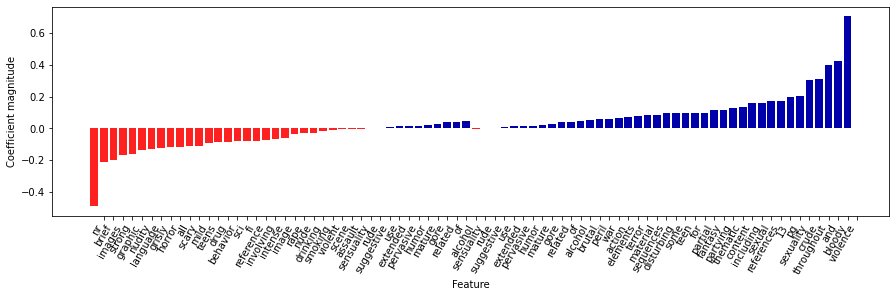

In [48]:
import mglearn

mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0],
    feature_names,n_top_features=40
)

왼쪽의 음수계수는 평균평점보다 낮은 영화의 등급안에 들어가는 단어들을 뜻하고,오른쪽의 양수계수는 평균평점보다 높은 영화의 등급안에 들어가는 단어들을 뜻한다.

In [49]:
tomato_df.columns

Index(['Name', 'Rating', 'Directed By', 'Runtime', 'Studio',
       'TOMATOMETER score', 'TOMATOMETER Count', 'AUDIENCE score',
       'AUDIENCE count', 'Tf_id'],
      dtype='object')

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

r_train,r_test,s_train,s_test = train_test_split(tomato_df['Runtime'],tomato_df['TOMATOMETER score'],random_state = 0)

logreg = LogisticRegression(max_iter=1000)

r_train = r_train[:,np.newaxis]
r_test = r_test[:,np.newaxis]
logreg.fit(r_train,s_train)

print("로지스틱선형회귀 예측점수:{:.2f}".format(logreg.score(r_test,s_test)))   #점수는 저조하게나온다. 정확도는 6%정도:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


로지스틱선형회귀 예측점수:0.06
